### PREDICTION OF AIRBNB LISTING PRICES

Importing packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

Importing data

In [ ]:
airbnb = pd.read_csv('/content/AirbnbListing_NYC.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


Understanding the information in the data

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Creating a new dataframe to analyse price and neighbourgood group together

In [ ]:
price_ng_df = airbnb[['neighbourhood_group','price']].dropna()
print(price_ng_df)

      neighbourhood_group  price
0                Brooklyn    149
1               Manhattan    225
2               Manhattan    150
3                Brooklyn     89
4               Manhattan     80
...                   ...    ...
48890            Brooklyn     70
48891            Brooklyn     40
48892           Manhattan    115
48893           Manhattan     55
48894           Manhattan     90

[48895 rows x 2 columns]


Scatter plot

Text(0, 0.5, 'Neighbourhood group')

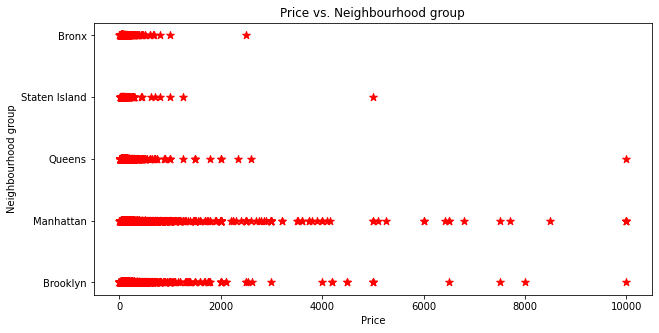

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(price_ng_df['price'], price_ng_df['neighbourhood_group'], color = 'r', marker = "*", s = 65)
plt.title("Price vs. Neighbourhood group")
plt.xlabel("Price")
plt.ylabel("Neighbourhood group")

Removing the outlier

In [ ]:
price_ng_df = price_ng_df[price_ng_df.price < 9999]
# To remove the 3 outliers to get a better fit of the data
print (price_ng_df)

      neighbourhood_group  price
0                Brooklyn    149
1               Manhattan    225
2               Manhattan    150
3                Brooklyn     89
4               Manhattan     80
...                   ...    ...
48890            Brooklyn     70
48891            Brooklyn     40
48892           Manhattan    115
48893           Manhattan     55
48894           Manhattan     90

[48889 rows x 2 columns]


Text(0, 0.5, 'Neighbourhood group')

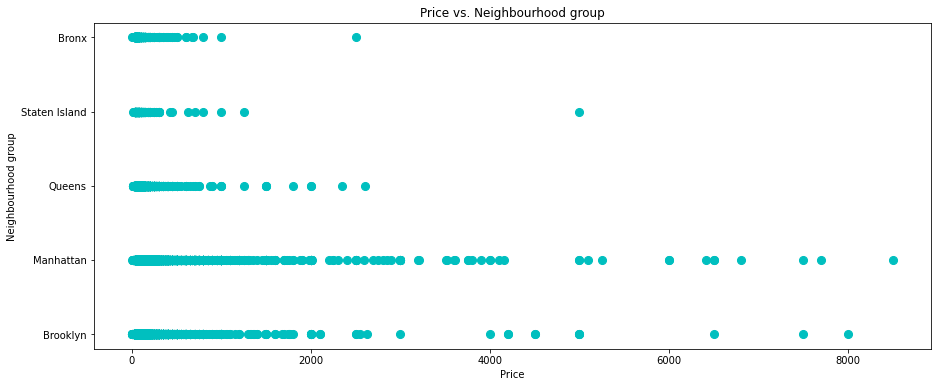

In [ ]:
plt.figure(figsize = (15,6))
plt.scatter(price_ng_df['price'], price_ng_df['neighbourhood_group'], color = 'c', s = 65)
plt.title("Price vs. Neighbourhood group")
plt.xlabel('Price')
plt.ylabel('Neighbourhood group')

Descriptive statistics

In [ ]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Filling up the missing values with 0

In [ ]:
airbnb['price'].fillna(0, inplace=True)

Correlation

In [ ]:
print(price_ng_df.corr())

       price
price    1.0


Creating X and Y

In [ ]:
feature_cols = ['latitude', 'longitude', 'minimum_nights', 'availability_365'] 
X = airbnb[feature_cols]

In [ ]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(48895, 4)


In [ ]:
y = airbnb['price']
y.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [ ]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(48895,)


Splitting the data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

Checking the shape and size of the newly created dataset

In [ ]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (39116, 4)
y_train shape:  (39116,)

Test cases as below
X_test shape:  (9779, 4)
y_test shape:  (9779,)


Linear regression in Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

Fitting the model

In [ ]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept:',linreg.intercept_)
print('Coefficients:',linreg.coef_)  

Intercept: -71655.6720491075
Coefficients: [ 2.20140486e+02 -8.49498345e+02  1.59563819e-01  1.69589406e-01]


*y = -71655.67 + (220.14 * latitude) + (-849.49 * longitude) + (0.15956 * minimum_nights) + (0.16958 * availability_365)*


In [ ]:
y_pred_train = linreg.predict(X_train)  

In [ ]:
y_pred_test = linreg.predict(X_test)  

In [ ]:
print(y_pred_test)

[ 84.59138619 161.4168431  144.92356551 ... 136.07636613 118.87358377
 137.24389997]
